<a href="https://colab.research.google.com/github/PreethiPara/Red_wine_quality_prediction-/blob/main/Red_Wine_quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
df=pd.read_csv('winequality-red.csv')
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**There is no missing data**
**Now Lets Do Data analysis and visualization**

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


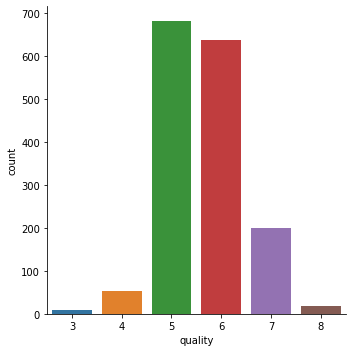

In [ ]:
#number of values for each quality
sns.catplot(x='quality',data=df,kind='count')

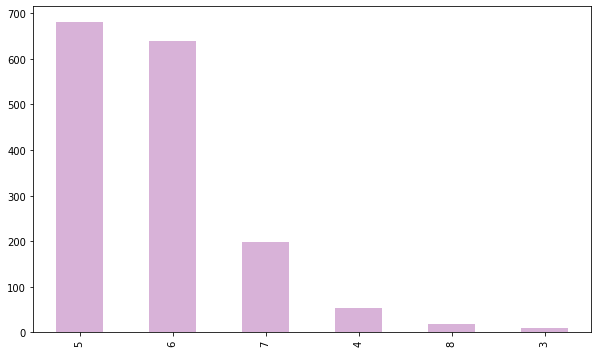

In [ ]:

df.quality.value_counts().plot.bar(figsize=(10,6),color='purple',alpha=0.3)

In [ ]:
df['quality'].nunique()

6

In [ ]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
#Checking for the duplicates

duplicate=df[df.duplicated()]
duplicate.shape


#there are 240 duplicates, it is possible that

(240, 12)

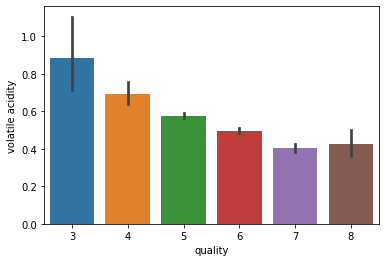

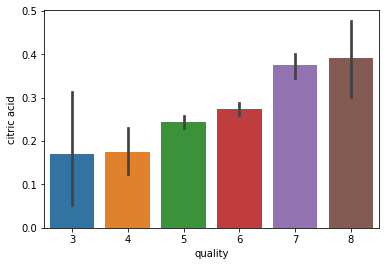

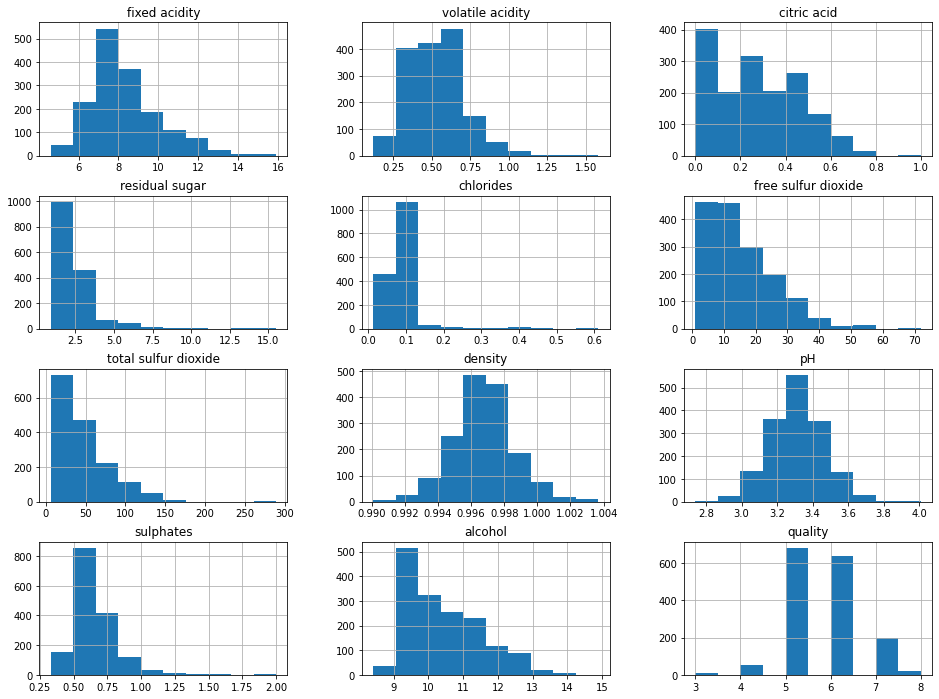

In [ ]:
#volatile acidity vs quality plot

plot=plt.figure(figsize=(6,4))
sns.barplot(x='quality',y='volatile acidity',data=df)


plot1=plt.figure(figsize=(6,4))
sns.barplot(x='quality',y='citric acid',data=df)


df.hist(bins=10,figsize=(16,12))
plt.show()



In [ ]:
df=df.rename(columns={'free sulfur dioxide':'free SO2'})
df.head()
df=df.rename(columns={'total sulfur dioxide':'total SO2'})
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free SO2,total SO2,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


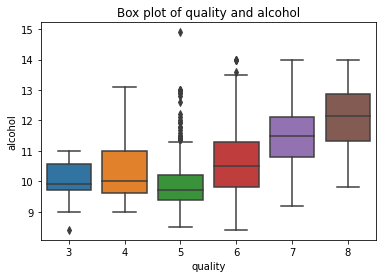

In [ ]:
sns.boxplot(df['quality'],df['alcohol'])
plt.title('Box plot of quality and alcohol')
plt.show()


In [ ]:

dm=df.loc[df.quality==3,:]
dm['alcohol'].describe()

count    10.000000
mean      9.955000
std       0.818009
min       8.400000
25%       9.725000
50%       9.925000
75%      10.575000
max      11.000000
Name: alcohol, dtype: float64

### **If citric acid content is high, quality is high**
### **If volatile acidity is high, the quality is low**

In [ ]:
df.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free SO2,total SO2,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free SO2,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total SO2,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


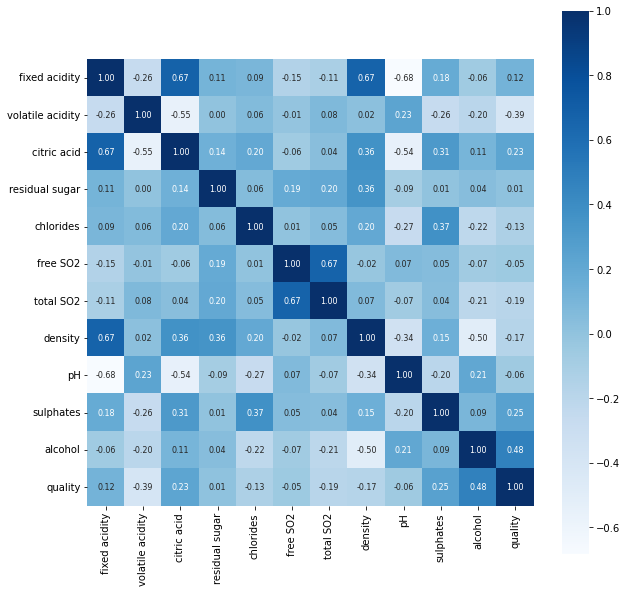

In [ ]:

#constructing a heat map to understand correlation between columns
#we can get which columns are positively correlated and which are negatively correlated
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Blues')

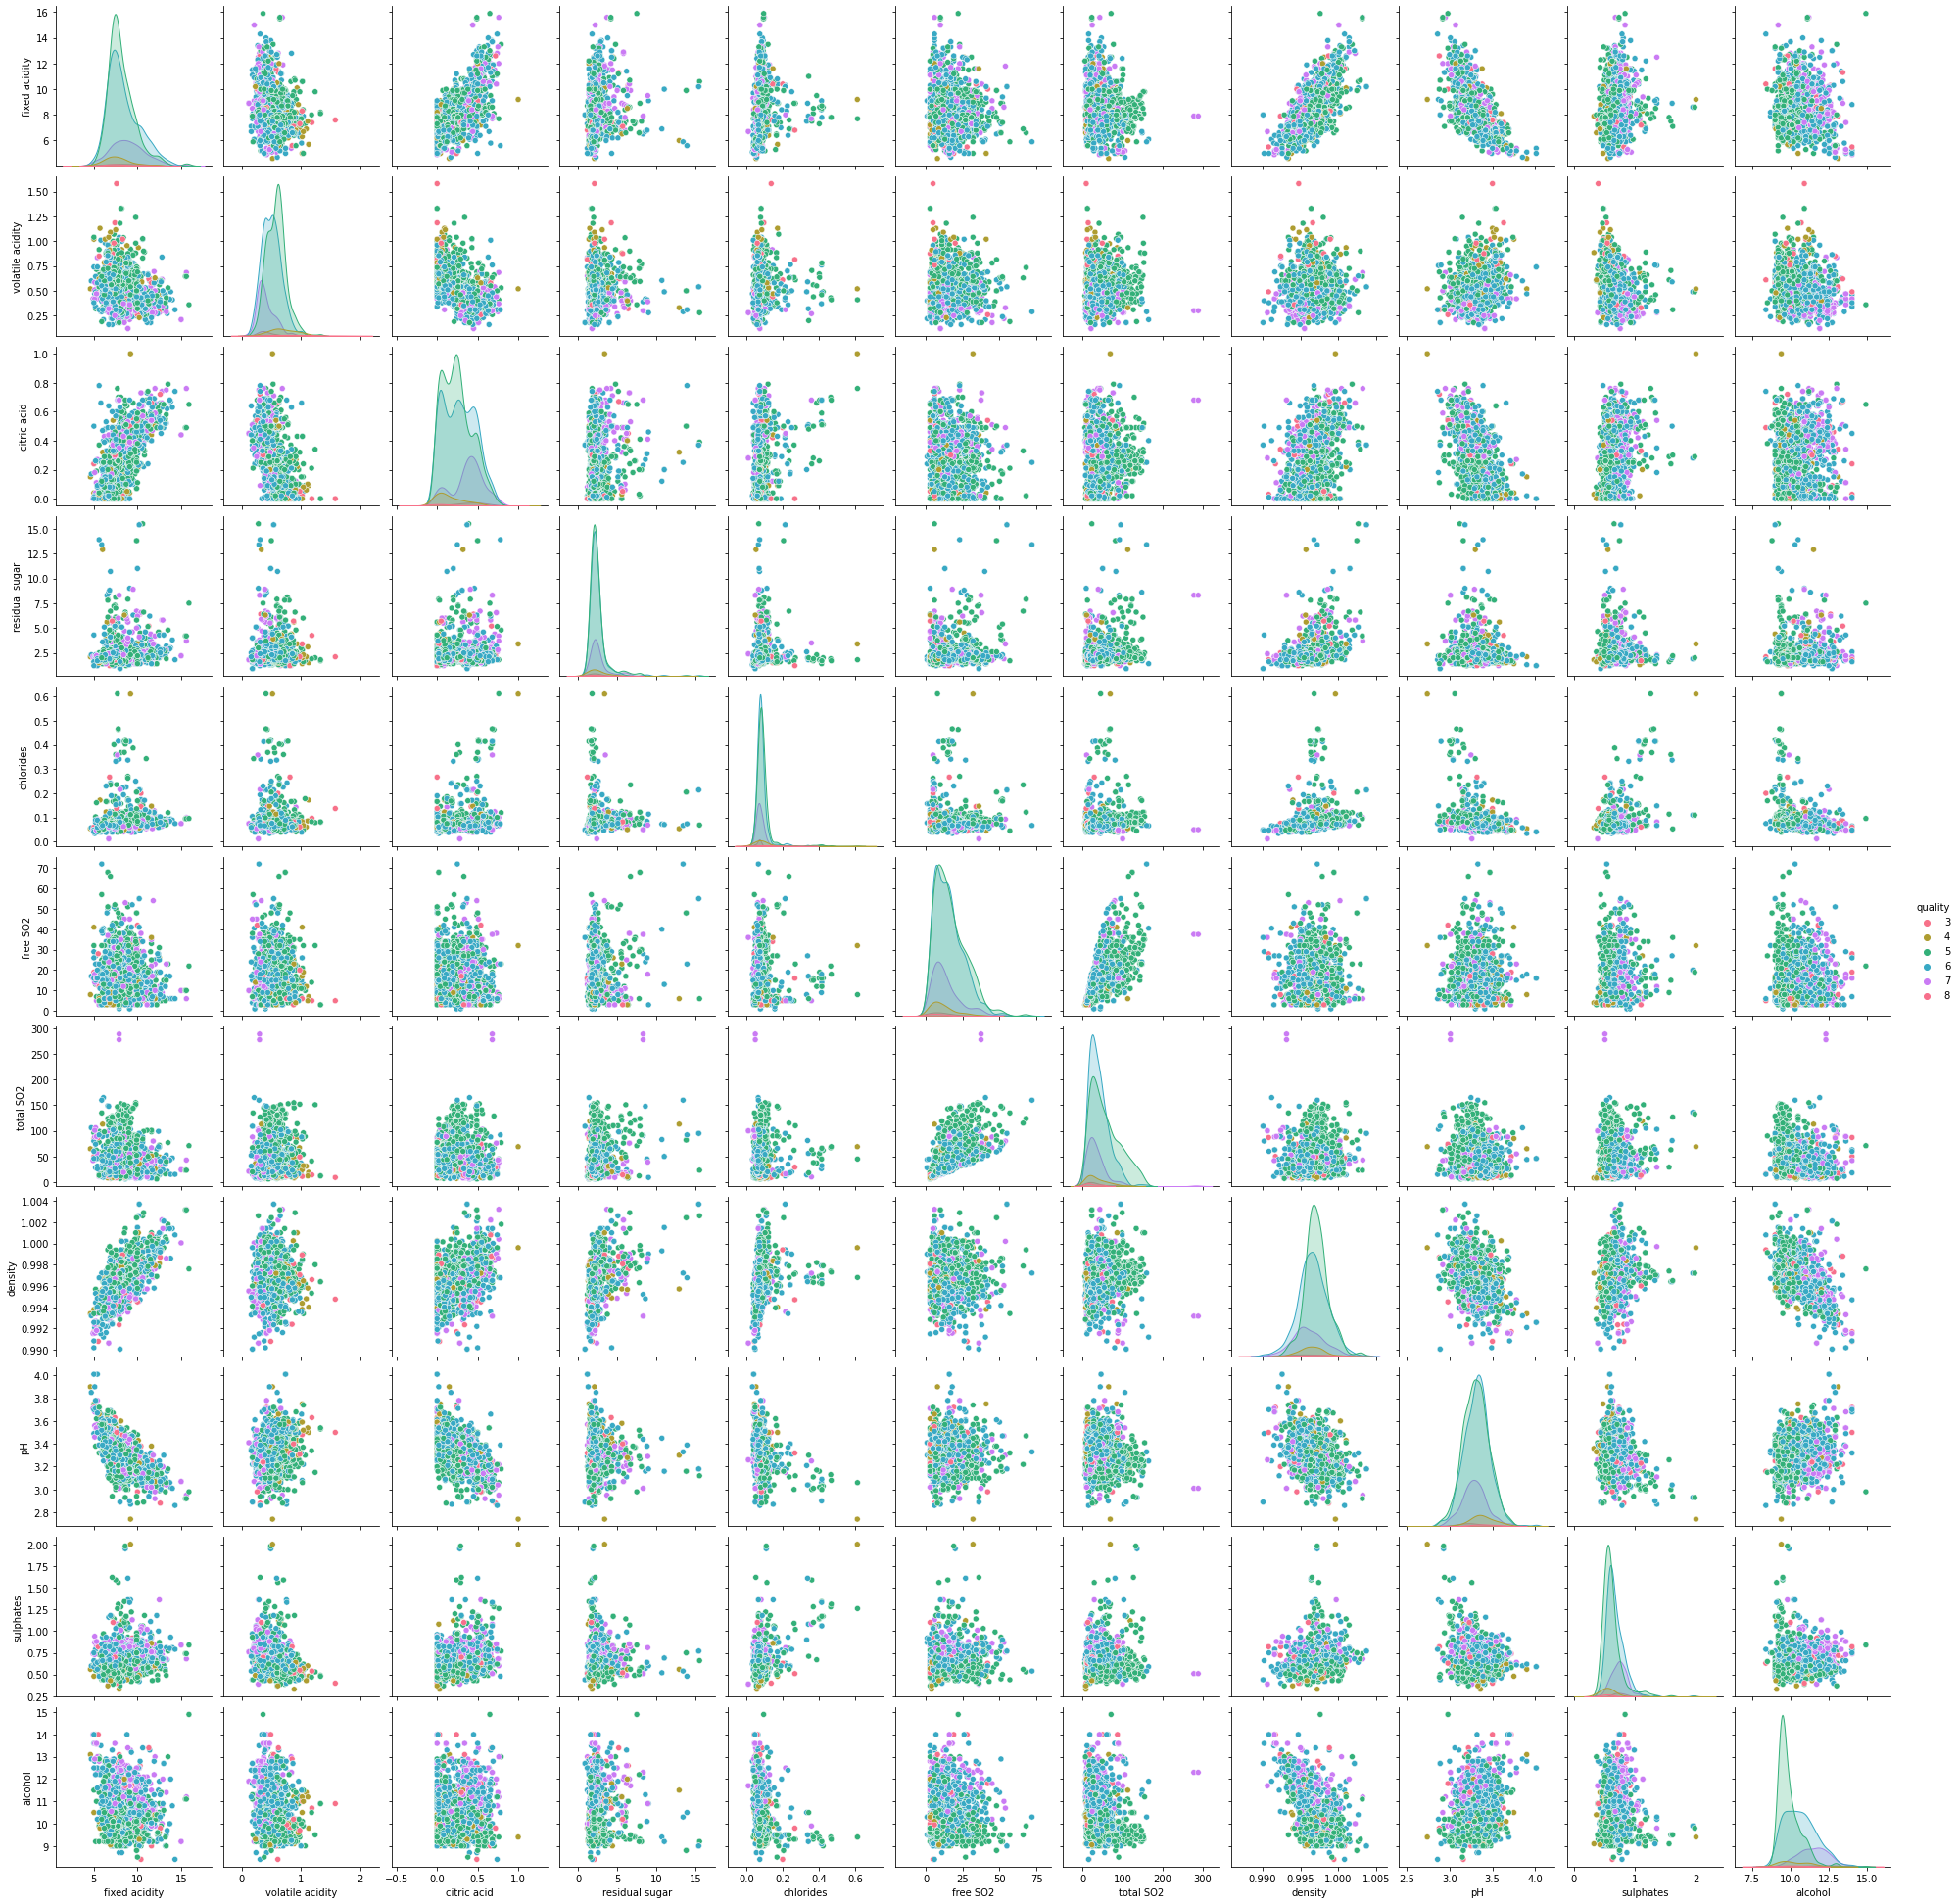

In [ ]:
sns.pairplot(df,hue='quality',diag_kind='kde',kind = "scatter",palette = "husl")

In [ ]:

df.head(20)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free SO2,total SO2,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
x=df.drop('quality',axis=1)
print(x)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

# **Label Binarization**

In [ ]:
y=df.quality.apply(lambda y_value:1 if y_value>=7 else 0)
print(y)
#1-good, 0-bad

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Int64Index([0, 1], dtype='int64')


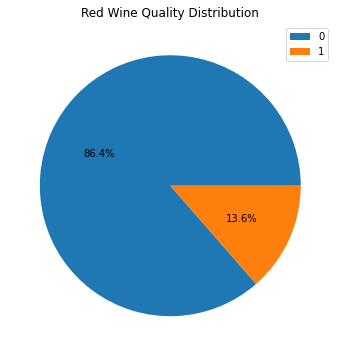

The amount of good quality white wine is  13.6 %.
mean white wine quality =  5.6360225140712945


In [ ]:
plt.figure(figsize=(6,6))
labels=y.value_counts().index
print(labels)
plt.pie(y.value_counts(),autopct='%1.1f%%')
plt.legend(labels)
plt.title('Red Wine Quality Distribution')
plt.show()
print('The amount of good quality white wine is ',round(y.value_counts(normalize=True)[1]*100,1),'%.')
print("mean white wine quality = ",df["quality"].mean())






0    1382
1     217
Name: quality, dtype: int64
86.42901813633522
13.570981863664791


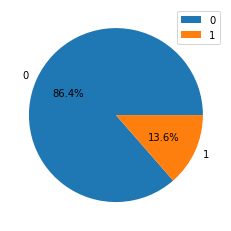

In [ ]:
l=y.value_counts()
print(l)
zero=((1382)/(1382+217))*100
print(zero)
one=((217)/(1382+217))*100
print(one)
x=[zero,one]
labels=['0','1']
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.legend()
plt.show()

In [ ]:
y.value_counts()
#prints count of good and bad red wine

0    1382
1     217
Name: quality, dtype: int64

### Predicting Red wine quality using




1.  Random Forest Classifier 
2.  Gaussian Naive Bayes Classifier
3. Decision Tree Classifier
4. KNeighbors Classifier
5. SVM Classifier






1.Random Forest classifier


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
print(x_train.shape,y_train.shape,y_test.shape)

model1=RandomForestClassifier()
model1.fit(x_train,y_train)
test_pred1=model1.predict(x_test)
accuracy=accuracy_score(y_test,test_pred1)
a=accuracy*100
print(f'Random Forest Classifier Accuracy:{a} %')



(1279, 11) (1279,) (320,)
Random Forest Classifier Accuracy:94.6875 %


In [ ]:
##Building a predictive system
input=np.asarray((7.4,	0.660,	0.00,	1.8,	0.075	,13.0,	40.0,	0.9978,	3.51,	0.56	,9.4))

#reshaping of data as we are predicting the label for only one instance
input_data=input.reshape(1,-1)

print(input)
print(input_data)


prediction=model1.predict(input_data)
print(prediction)


if (prediction[0]==1):
  print('good quality wine')
else:
   print('bad quallity wine')

[ 7.4     0.66    0.      1.8     0.075  13.     40.      0.9978  3.51
  0.56    9.4   ]
[[ 7.4     0.66    0.      1.8     0.075  13.     40.      0.9978  3.51
   0.56    9.4   ]]
[0]
bad quallity wine


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


2.Gaussian Naive Bayes Classifier


In [ ]:
from sklearn.naive_bayes import GaussianNB

model2=GaussianNB()
model2.fit(x_train,y_train)

test_pred2=model2.predict(x_test)
accuracy=accuracy_score(y_test,test_pred2)
b=accuracy*100
print(f'Gaussian Naive Bayes Classifier Accuracy:{b} %')



Gaussian Naive Bayes Classifier Accuracy:85.625 %


3.Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model3=DecisionTreeClassifier(max_depth=10)
model3.fit(x_train,y_train)

           
test_pred3=model3.predict(x_test)
accuracy=accuracy_score(y_test,test_pred3)
c=accuracy*100
print(f'Decision Tree Classifier Accuracy:{c} %')

Decision Tree Classifier Accuracy:91.25 %


4.KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier(n_neighbors=3)
model4.fit(x_train,y_train)

test_pred4=model4.predict(x_test)
accuracy=accuracy_score(y_test,test_pred4)
d=accuracy*100
print(f'K Neighbors Classifier Accuracy:{d} %')


K Neighbors Classifier Accuracy:88.75 %


5.Support Vector Machines

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
model5=SVC(C=1,kernel='rbf')
model5.fit(x_train,y_train)


test_pred5=model5.predict(x_test)
accuracy=accuracy_score(y_test,test_pred5)
e=accuracy*100
print(f'SVM Classifier Accuracy:{e} %')


SVM Classifier Accuracy:88.4375 %


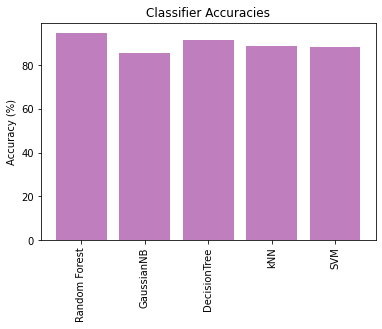

In [ ]:
predictors_group = ('Random Forest', 'GaussianNB', 'DecisionTree','kNN','SVM')
x_pos = np.arange(len(predictors_group))
accuracies1 = [a, b, c,d,e]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='purple')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

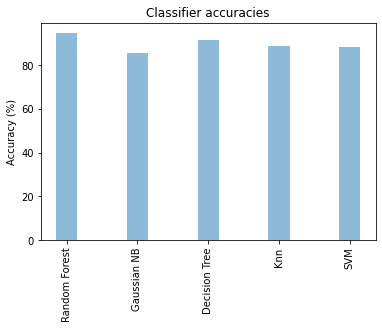

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Dataset generation
data_dict = {'Random Forest':a, 'Gaussian NB':b, 'Decision Tree':c,'Knn':d,'SVM':e}
courses = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (6, 4))
#  Bar plot
plt.bar(courses, values,width=0.3,alpha=0.5)
plt.xticks(rotation='vertical')
plt.ylabel("Accuracy (%)")
plt.title("Classifier accuracies")
plt.show()

**Reducing overfitting using Cross Validation**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC



models=[]
models.append(('RF',RandomForestClassifier()))
models.append(('GNB',GaussianNB()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('KN',KNeighborsClassifier()))
models.append(('SVM',SVC()))





In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,random_state=3,shuffle=True)
kf.get_n_splits(x)
print(kf)
acc=[]  ##algorithm model accuracies
model_name=[] ##all model names

for name,model in models:
  acc_of_model=cross_val_score(model,x_train,y_train,cv=kf,scoring='accuracy')
  acc.append(acc_of_model)
  model_name.append(name)
  
N=len(acc)
print(N)
i=0
for i in range(N):
  print(f'{model_name[i]}: {acc[i].mean()*100} %')


KFold(n_splits=10, random_state=3, shuffle=True)
5
RF: 90.46259842519684 %
GNB: 83.42581200787403 %
DT: 85.84830216535433 %
KN: 84.75578248031496 %
SVM: 86.08513779527559 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


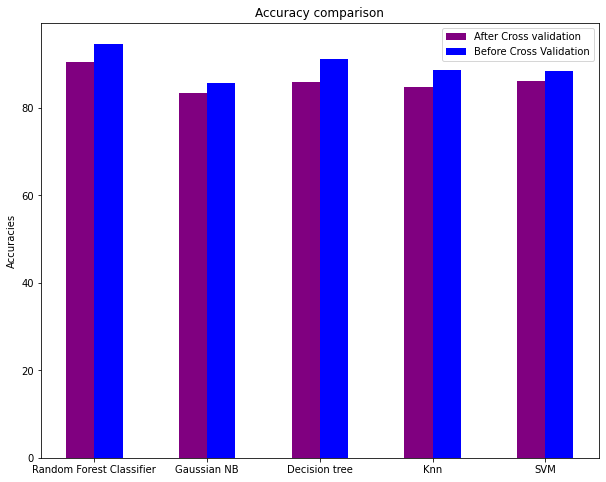

In [ ]:
labels=['Random Forest Classifier','Gaussian NB','Decision tree','Knn','SVM']
Before_cross_validation=[94.6875,85.625,91.25,88.75,88.4375]
After_cross_validation=[90.46,83.425,85.8483,84.7557,86.085]
#x=0,1,2,3,4
x=np.arange(len(labels))
width=0.25

a,b=plt.subplots(figsize=(10,8))
p1=b.bar(x-width/2,After_cross_validation,width,label='After Cross validation',color='purple')
p2=b.bar(x+width/2,Before_cross_validation,width,label='Before Cross Validation',color='blue')

b.set_ylabel('Accuracies')
b.set_title('Accuracy comparison')
b.set_xticks(x)
b.set_xticklabels(labels)
b.legend(loc='top right')
plt.show()


